# <center> Predicting Stars, Galaxies & Quasars with ML Model




<center> <img src = "https://chandra.harvard.edu/photo/2019/gsn069/gsn069_525.gif" width = 55%>

# About the Problem & Our Dataset - <a name ="h1"></a>

### So what exactly are stars, galaxies, and quasars? 

*     A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.

<center>
    <img src="images/galaxy.jpeg" width="50%">
</center> 

*     A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.

<center>
    <img src="images/star.jpg" width="50%">
</center>


*     A QUASAR, also known as a quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. A typical quasar is 27 trillion times brighter than our sun! If you were to place a quasar at the distance of Pluto, it would vaporise all of Earth’s oceans to steam in a fifth of a second.

<center>
    <img src="images/quasar.jpg" width="50%">
</center>

The dataset we'll be using for this model is the [Sloan Digital Sky Survey DR14](https://www.kaggle.com/datasets/lucidlenn/sloan-digital-sky-survey)

The data consists of 10,000 observations of space taken by the SDSS. Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. 30% of it is used in testing the model performance and 70% in training of the model.

# Importing necessary libraries and modules for the dataset <a name = 'h2'></a>

### First of all we need to import all the packages we need. Numpy and Pandas for data manipulation and all the modules from sklearn for the machine learning feature


In [ ]:
#Importing Necessary Libraries

# Operating System Functionality
import os

# Data Handling & Linear Algebra
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulating Data and Model Building
import tensorflow as tf
from tensorflow import keras

# Data Analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Measuring Classification Performance
from sklearn.metrics import accuracy_score

# Classification & Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ignore warnings
import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

# Exploratory Analysis<a name ='h3'></a>

In [71]:
#Loading data into a dataframe
data = pd.read_csv("data.csv")

In [72]:
#Displaying the first 5 rows of the dataset
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [73]:
#Displaying the dimensions of the dataset
data.shape

(10000, 18)

#### The object id columns are of little use in the analysis hence we can delete them from the dataset.

In [74]:
#Drop the object id columns, they are of no use in the analysis
data.drop(['objid','specobjid'], axis=1, inplace=True)

In [75]:
#Data after dropping columns
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,STAR,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,STAR,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,GALAXY,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,STAR,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,STAR,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,GALAXY,0.040508,288,52000,400


In [76]:
data.shape

(10000, 16)

In [77]:
data.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [78]:
#Checking for null values to determine completeness of the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


No missing data so the dataset is complete with no voids and missing cells

### The Target from data is Data classification to Star Galaxy or Quasar, so the class column has 3 Categories and in this case we need to convert them into numeric data.

Scikit-learn offers a highly effective tool for converting categorical feature levels into numeric values. The ```LabelEncoder().fit``` method transforms labels into integers ranging from 0 to n_classes-1, where n represents the total number of unique labels. If a label appears multiple times, it is assigned the same numeric value as it was previously. You can read more about it [here](https://stackoverflow.com/questions/66056695/what-does-labelencoder-fit-do)!




In [79]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

In [80]:
# Check the learned classes and their corresponding numeric values
print("Learned classes:", le.classes_)
print("Numeric mapping:", list(zip(le.classes_, le.transform(le.classes_))))

Learned classes: ['GALAXY' 'QSO' 'STAR']
Numeric mapping: [('GALAXY', np.int64(0)), ('QSO', np.int64(1)), ('STAR', np.int64(2))]


# The Final Dataset <a name = 'h4'></a>

In [81]:
#Printing the dataset after all the changes to check the dataset
data.head(10)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512
5,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,2,0.000315,324,51666,594
6,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,0,0.100242,287,52023,559
7,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,2,0.000315,3306,54922,515
8,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,2,0.000089,323,51615,595
9,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,0,0.040508,288,52000,400


After lable encoding, Galaxies have been replaced by number 0, Quasars by number 1 and Stars by number 2

In [82]:
#Checking the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


Perform train and test split

In [83]:
X = data.drop('class', axis=1)
y = data['class']

# Data Scaling <a name = 'h5'></a>

Scaling involves transforming floating-point feature values from their original range (e.g., 100 to 900) into a standardized range, typically 0 to 1 or -1 to +1. The ```StandardScaler``` normalizes the data to follow a Standard Normal Distribution (SND), which sets the mean to 0 and adjusts the data to have a unit variance. You can read more about other types of scalers [here](https://www.geeksforgeeks.org/standardscaler-minmaxscaler-and-robustscaler-techniques-ml/) and scaling in general [here](https://developers.google.com/machine-learning/data-prep/transform/normalization).

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True , with_mean= True , with_std = True)
X= scaler.fit_transform(X)

In [85]:
#Show data
X[:10]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [86]:
#Performing the 30% test and 70% train split here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

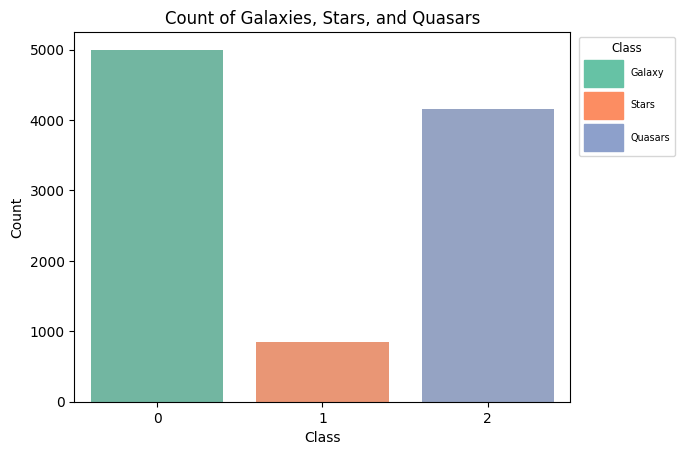

In [87]:
# Create a count plot
ax = sns.countplot(x=data['class'], palette='Set2')

# Map numerical values to category names
category_names = {0: 'Galaxy', 1: 'Stars', 2: 'Quasars'}

# Create legend handles and labels
handles = [plt.Rectangle((0, 0), 1, 1, color=sns.color_palette('Set2')[i]) for i in range(3)]
labels = [category_names[i] for i in range(3)]

# Add legend to the plot
legend = ax.legend(
    handles=handles,
    labels=labels,
    title='Class',
    loc='upper right',
    bbox_to_anchor=(1.22, 1.0),  # Adjust position relative to the plot
    fontsize='x-small',
    title_fontsize='small',
    handlelength=4,
    handleheight=4,
    borderpad=0.5,
    labelspacing=0.5
)

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Galaxies, Stars, and Quasars')

# Show the plot
plt.show()

# Density Distribution Plots

### Some information about the filters used while gathering the data:
"U" stands for ultraviolet.
"G" stands for green. 
"R" stands for red. 
"I" stands for infrared. 

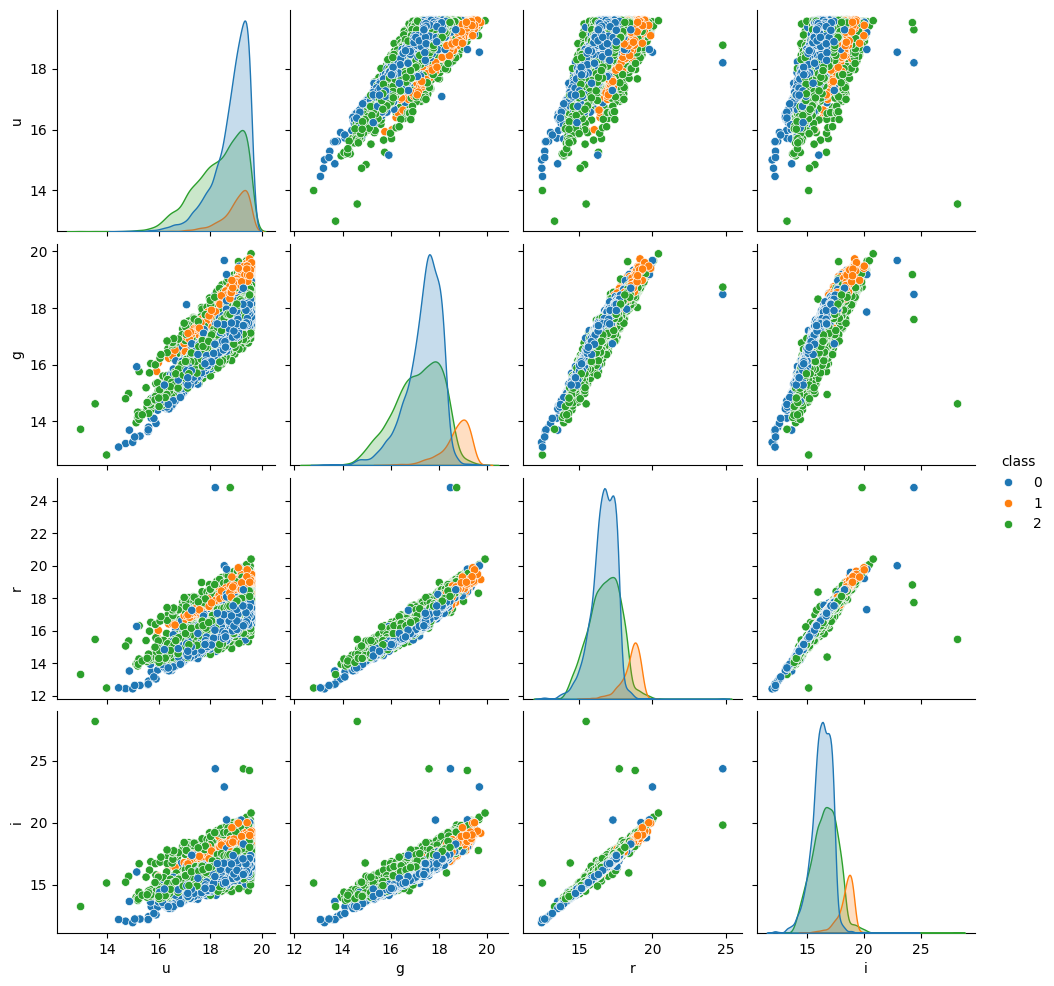

In [113]:
#Using pairplots to establish and understand interdependancy of train features
sns.pairplot(data[['u','g','r','i','class']],hue="class", diag_kind="kde", palette="tab10")

## Machine Learning models (Classification models) <a name = 'h6'></a>

### Decision tree classifier -

<p align="justify">The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria are different for classification and regression trees.</p>

<p align="justify">Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable. The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.</a>

<center>
    <img src="images/decision_tree_classifier.png" width="50%">
</center>

<br> The algorithm selection is also based on the type of target variables. Let us look at some algorithms used in Decision Trees:

1. ID3 → (extension of D3)

2. C4.5 → (successor of ID3)

3. CART → (Classification And Regression Tree)

4. CHAID → (Chi-square automatic interaction detection Performs multi-level splits when computing classification trees)

5. MARS → (multivariate adaptive regression splines)

<p align="justify">To understand these, let's have a look at the most primitive of these - ID3.

[Link for the example.](https://www.appliedaicourse.com/blog/id3-algorithm-in-machine-learning/)

You can read further about the methods [here](https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html).  

The tree begins at what’s called the root node (shown in blue), ends at leaf nodes (shown in green), and has intermediate or internal nodes in between. The root and intermediate nodes act as decision points, while the leaf nodes represent the final results or outcomes.

ID3, short for Iterative Dichotomiser 3, is named for its method of repeatedly splitting features into two or more groups at each step. Created by Ross Quinlan, ID3 builds decision trees using a top-down, greedy approach. The "top-down" part means the tree is constructed starting from the top, and the "greedy" part means the algorithm picks the best feature available at each step to create a node. ID3 is commonly used for classification tasks that involve only nominal (categorical) features.

To decide which feature to use at each step, ID3 relies on Information Gain (or just Gain). Information Gain measures how much a feature reduces entropy, which is essentially a way to evaluate how well a feature can separate or classify the target categories. The feature with the highest Information Gain is selected as the best choice.

In simpler terms, entropy is a measure of disorder or uncertainty. In a dataset, entropy reflects how mixed or disordered the target feature is. For binary classification problems (where the target has only two possible classes), entropy is 0 if all values in the target are the same (perfectly ordered) and reaches 1 if the target has an equal mix of both classes (maximum disorder).

ID3 Steps -

1. Calculate the Information Gain of each feature.
2. Considering that all rows don’t belong to the same class, split the dataset S into subsets using the feature for which the Information Gain is maximum.
3. Make a decision tree node using the feature with the maximum Information gain.
4. If all rows belong to the same class, make the current node as a leaf node with the class as its label.
5. Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

We denote our dataset as S, entropy is calculated as -
<center>
    <img src="images/entropy.jpg" width="50%">
</center>
Where n is the total number of classes in the target column;
pᵢ is the probability of class ‘i’ or the ratio of “number of rows with class i in the target column” to the “total number of rows” in the dataset.

Information Gain for a feature column A is calculated as -


<center>
    <img src="images/information_gain.jpg" width="50%">
</center>

where Sᵥ is the set of rows in S for which the feature column A has value v, |Sᵥ| is the number of rows in Sᵥ and likewise |S| is the number of rows in S.

### Linear regression classifier -

Machine learning typically involves predicting either a quantitative outcome or a qualitative class. Predicting a quantitative outcome is known as a regression problem. For instance, in linear regression, the input is a continuous variable, and the output is a numerical value. On the other hand, predicting a qualitative outcome, or class, is referred to as a classification problem. Examples of classification tasks include predicting which products a user might purchase or whether a user will click on an online ad.

However, not all algorithms fit neatly into this binary distinction. A prime example is logistic regression. Despite being part of the regression family and involving the prediction of outcomes based on quantitative relationships between variables, logistic regression differs from linear regression. It can handle both continuous and discrete inputs, and its output is qualitative, predicting discrete classes such as "Yes/No" or "Customer/Non-customer." 

<center>
    <img src="images/linear_classifier.png" width="35%">
</center>

In practice, the logistic regression algorithm evaluates the relationships between variables and calculates probabilities for discrete outcomes using the Sigmoid function. This function maps numerical results into probabilities ranging from 0 to 1, where 0 indicates the event does not occur, and 1 indicates it does. For binary classification, a threshold of 0.5 is commonly used to split the population into two groups: predictions with probabilities greater than 0.5 are assigned to Group A, while those below 0.5 are assigned to Group B. This method enables logistic regression to make clear binary predictions based on the computed probabilities.

You can read further about them [here](https://www.kdnuggets.com/2022/07/logistic-regression-work.html#:~:text=is%20Logistic%20Regression%3F-,Logistic%20regression%20is%20a%20Machine%20Learning%20classification%20algorithm%20that%20is,the%20logistic%20of%20the%20result.)

### KNN classifier -

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

<center>
    <img src="images/knn_classifier.png" width="70%">
</center>

The image illustrates how data points that are similar tend to be located close to one another. As shown, similar data points often cluster together in close proximity. The KNN (K-Nearest Neighbors) algorithm relies on this assumption, as it forms the foundation for the algorithm's effectiveness. KNN uses the concept of similarity—also referred to as distance, proximity, or closeness—which is calculated using basic mathematical principles, such as measuring the distance between points on a graph, a concept many of us learned early in our education.

In [89]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

#Fitting the models to the dataset
dtClassifer.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15)

In [90]:
#Linear Classifier - Logistic Regression
LRClassifer = LogisticRegression()

#Fitting the models to the dataset
LRClassifer.fit(X_train, y_train)

LogisticRegression()

In [91]:
#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

#Fitting the models to the dataset
NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [92]:
#Getting the prediction set of the models
y_preds = dtClassifer.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_preds)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 99.00%


In [93]:

#Getting the prediction set of the models
y_predsLR = LRClassifer.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predsLR)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.60%


In [94]:
#Getting the prediction set of the models
y_predsNeNe = NeNeClassifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predsNeNe)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 90.73%


In [95]:
#Displaying the last 10 predictions on the test split as output by all the models
print(y_preds[:10],'\n',y_test[:10])


[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


In [96]:
#Displaying the last 10 predictions on the test split as output by all the models
print(y_predsLR[:10],'\n',y_test[:10])


[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


In [97]:
#Displaying the last 10 predictions on the test split as output by all the models
print(y_predsNeNe[:10],'\n',y_test[:10])

[2 0 2 2 0 0 2 1 0 0] 
 7054    2
4692    0
907     2
4498    2
9957    0
3341    0
7152    2
1152    1
7105    0
2066    0
Name: class, dtype: int64


### Classification Report

In [98]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Linear Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.99      0.99      1504
           1       0.94      0.98      0.96       255
           2       1.00      1.00      1.00      1241

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000


  Linear Regression -
                 precision    recall  f1-score   support

           0       0.97      0.99      0.98      1469
           1       0.94      0.97      0.96       258
           2       0.99      0.96      0.98      1273

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.94      0.89      0.91      1575
           1       0.88      0.97      0.92       240
     

## Heat map

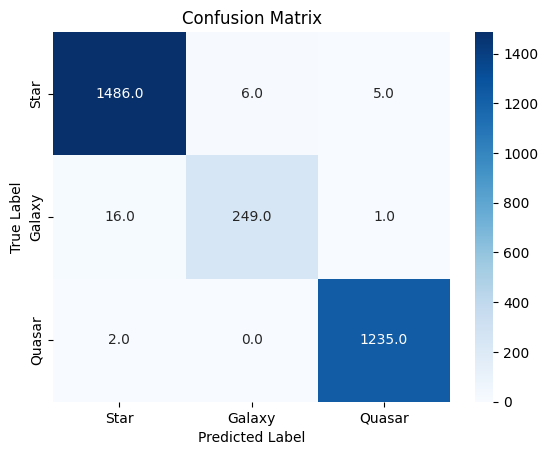

In [99]:
sns.heatmap(confusion_matrix(y_test , y_preds),annot=True,fmt='.1f', cmap="Blues", xticklabels=["Star", "Galaxy", "Quasar"], yticklabels=["Star", "Galaxy", "Quasar"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


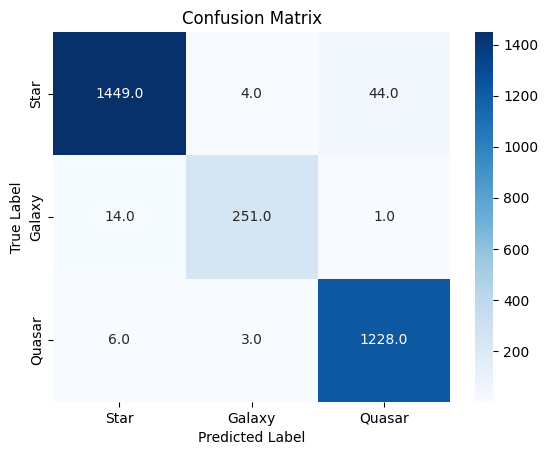

In [100]:
sns.heatmap(confusion_matrix(y_test , y_predsLR),annot=True,fmt='.1f', cmap="Blues", xticklabels=["Star", "Galaxy", "Quasar"], yticklabels=["Star", "Galaxy", "Quasar"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

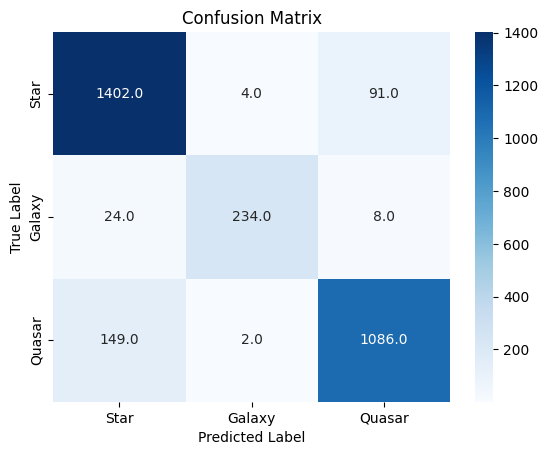

In [101]:
sns.heatmap(confusion_matrix(y_test , y_predsNeNe),annot=True,fmt='.1f', cmap="Blues", xticklabels=["Star", "Galaxy", "Quasar"], yticklabels=["Star", "Galaxy", "Quasar"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Visualizing the decision tree for the above generated model

In [ ]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data["class"])  # Ensure LabelEncoder is fitted

# Feature selection
features = ["ra", "dec", "u", "g", "r", "i", "z","run", "rerun", "camcol", "field","redshift", "plate", "mjd", "fiberid"]


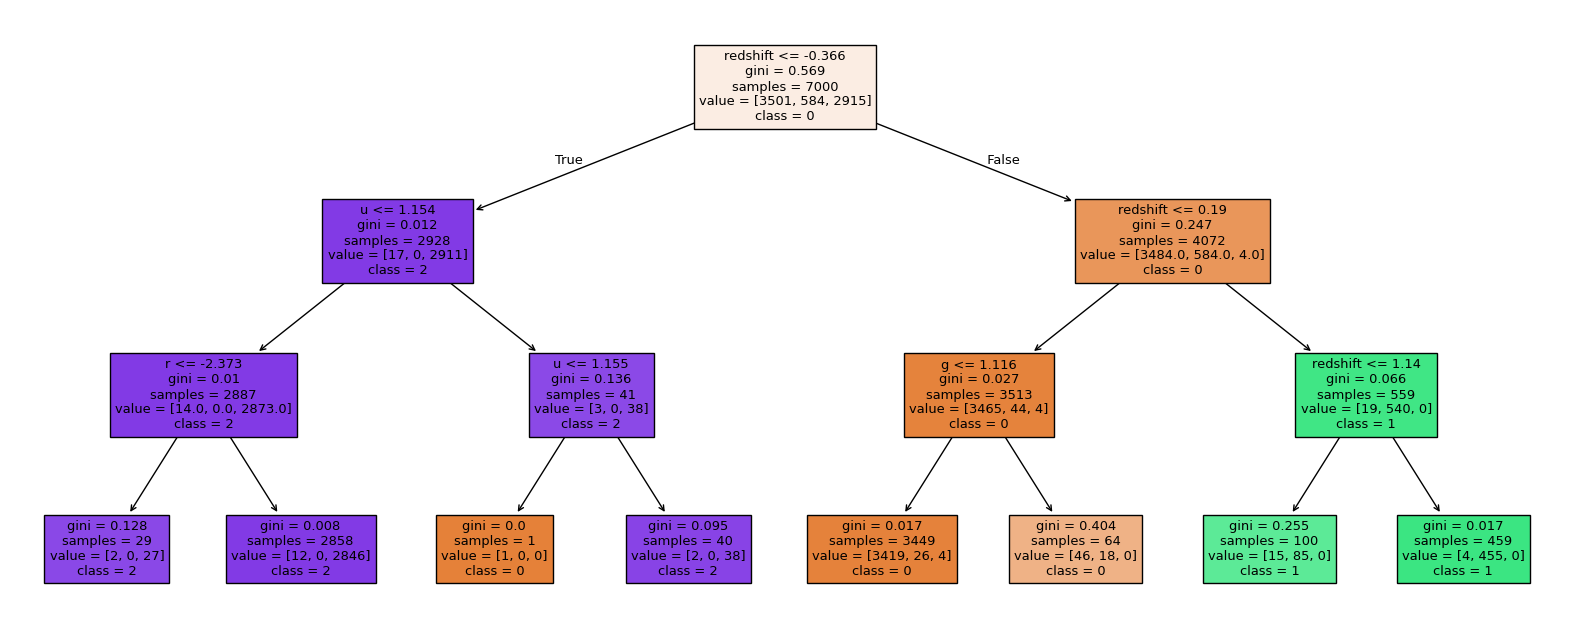

In [103]:
# Convert class names to string format
class_names = list(map(str, label_encoder.classes_))

# Visualize the decision tree
plt.figure(figsize=(20, 8))
plot_tree(dtClassifer, feature_names=features, class_names=class_names, filled=True)
plt.show()

###  Visualize the correlation matrix

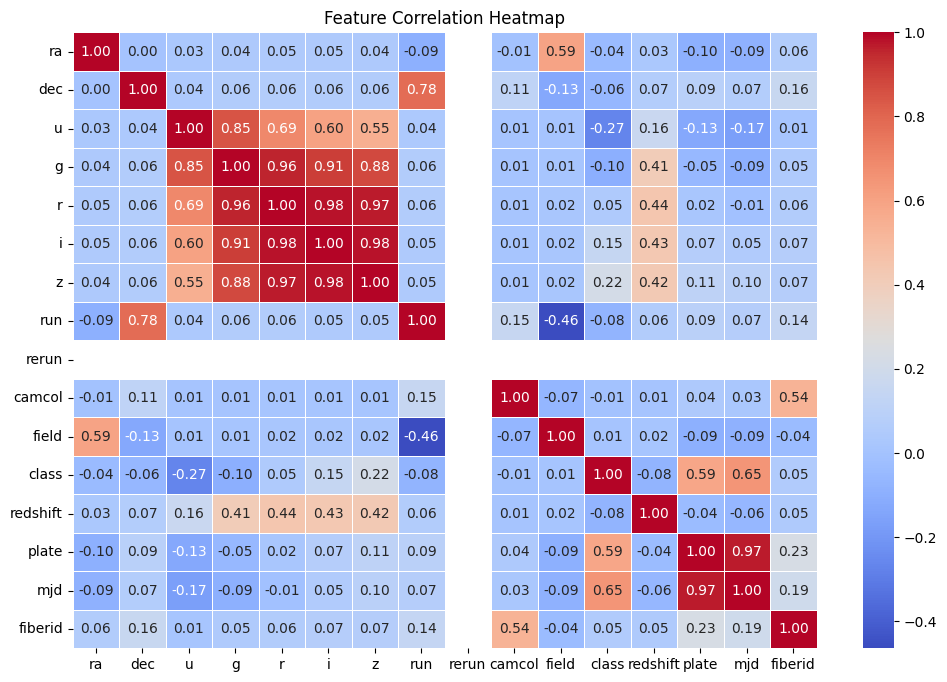

In [104]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()